<a href="https://colab.research.google.com/github/deepanshijindal23/echocardiogram-data-preprocessing/blob/main/Echocardiogram_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Task 1(A)

#read the data set

df = pd.read_csv("Echocardiogram_dataset.csv")
df

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.000,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.700,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.000,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.450,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.250,0.571,name,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,7.5,1.0,64.0,0.0,0.240,12.900,4.720,12.0,1.000,0.857,name,NaN,NaN
129,41.0,0.0,64.0,0.0,0.280,5.400,5.470,11.0,1.100,0.714,name,NaN,NaN
130,36.0,0.0,69.0,0.0,0.200,7.000,5.050,14.5,1.210,0.857,name,NaN,NaN
131,22.0,0.0,57.0,0.0,0.140,16.100,4.360,15.0,1.360,0.786,name,NaN,NaN


In [ ]:
#Task 1(b)

# Key clinical features

key_features = [ 'age','fractionalshortening','epss',
    'lvdd','wallmotion-score','wallmotion-index']

#Identify missing values

print("Missing values before imputation:")
print(df[key_features].isnull().sum())


Missing values before imputation:
age                      7
fractionalshortening     9
epss                    16
lvdd                    12
wallmotion-score         5
wallmotion-index         3
dtype: int64


In [ ]:
#Task 1(b)

#Handle missing values using median imputation

for feature in key_features:
    df[feature] = df[feature].fillna(df[feature].median())

# Verify missing values after imputation

print("\nMissing values after imputation:")
print(df[key_features].isnull().sum())




Missing values after imputation:
age                     0
fractionalshortening    0
epss                    0
lvdd                    0
wallmotion-score        0
wallmotion-index        0
dtype: int64


In [ ]:
#Task 1(c)

# Binary feature

binary_features = ['pericardialeffusion']

# Mode imputation

for feature in binary_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])

# Verify missing values after imputation

print("\nMissing values after imputation:")
print(df[binary_features].isnull().sum())



Missing values after imputation:
pericardialeffusion    0
dtype: int64


In [ ]:
#Task 1(d)

# Identify ambiguous records

ambiguous_records = (df['survival'] < 12) & (df['alive'] == 1)

# Number of ambiguous records

print("Ambiguous records found:", ambiguous_records.sum())

# Drop ambiguous records

df.drop(df[ambiguous_records].index, inplace=True)

print("Ambiguous records after removal:",
      ((df['survival'] < 12) & (df['alive'] == 1)).sum())


Ambiguous records found: 34
Ambiguous records after removal: 0


In [ ]:
#Task 1(e)

# Drop columns only if they exist

df.drop(columns=['mult', 'group'], errors='ignore', inplace=True)

df


,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,name,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.000,name,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.700,name,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.000,name,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.450,name,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.250,name,0.0
...,...,...,...,...,...,...,...,...,...,...,...
127,21.0,0.0,61.0,0.0,0.140,25.500,5.160,14.0,1.270,name,NaN
129,41.0,0.0,64.0,0.0,0.280,5.400,5.470,11.0,1.100,name,NaN
130,36.0,0.0,69.0,0.0,0.200,7.000,5.050,14.5,1.210,name,NaN
131,22.0,0.0,57.0,0.0,0.140,16.100,4.360,15.0,1.360,name,NaN


In [ ]:
#Task 2 (A)

#The pericardial effusion variable was already encoded in binary form (0/1), therefore no additional transformation was required.

In [ ]:
#Task 2 (B)

#Creating a target variable

df["alive_at_1"] = (df["survival"] >= 12).astype(int)
df

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,name,aliveat1,alive_at_1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.00,1.000,name,0.0,0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.00,1.700,name,0.0,1
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.00,1.000,name,0.0,1
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.00,1.450,name,0.0,1
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.00,2.250,name,0.0,1
5,26.0,0.0,68.0,0.0,0.260,5.000,4.310,12.00,1.000,name,0.0,1
6,13.0,0.0,62.0,0.0,0.230,31.000,5.430,22.50,1.875,name,0.0,1
7,50.0,0.0,60.0,0.0,0.330,8.000,5.250,14.00,1.000,name,0.0,1
8,19.0,0.0,46.0,0.0,0.340,0.000,5.090,16.00,1.140,name,0.0,1
9,25.0,0.0,54.0,0.0,0.140,13.000,4.490,15.50,1.190,name,0.0,1


In [ ]:
#Task 2 (C)

#Scaling

scale_cols = ["age", "fractionalshortening", "lvdd"]

for col in scale_cols:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

print(df[scale_cols])

          age  fractionalshortening      lvdd
0    0.782609              0.396552  0.511211
1    0.804348              0.603448  0.399103
2    0.434783              0.396552  0.246637
3    0.543478              0.384483  0.511883
4    0.478261              0.224138  0.769058
..        ...                   ...       ...
127  0.565217              0.189655  0.636771
129  0.630435              0.431034  0.706278
130  0.739130              0.293103  0.612108
131  0.478261              0.189655  0.457399
132  0.586957              0.206897  0.491031

[99 rows x 3 columns]


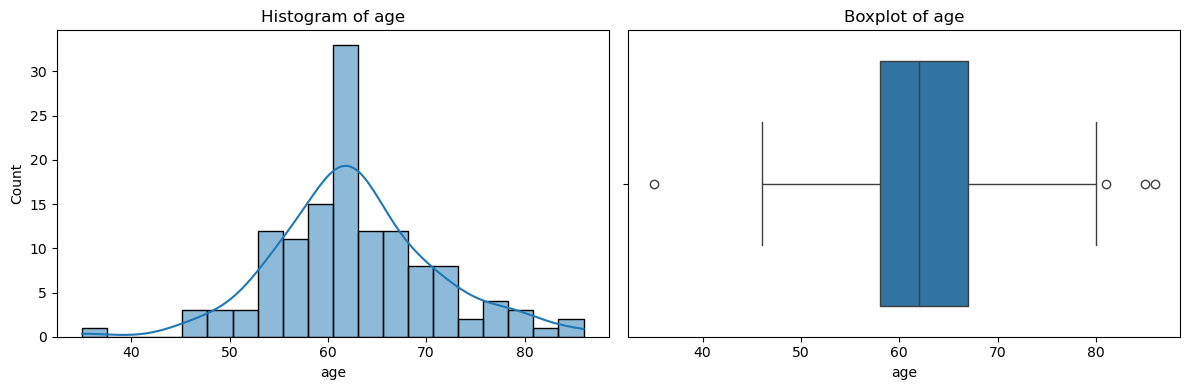

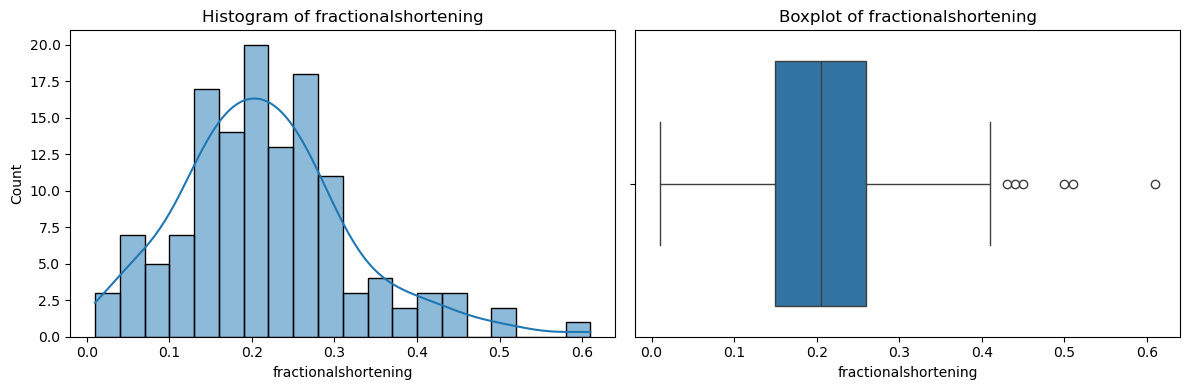

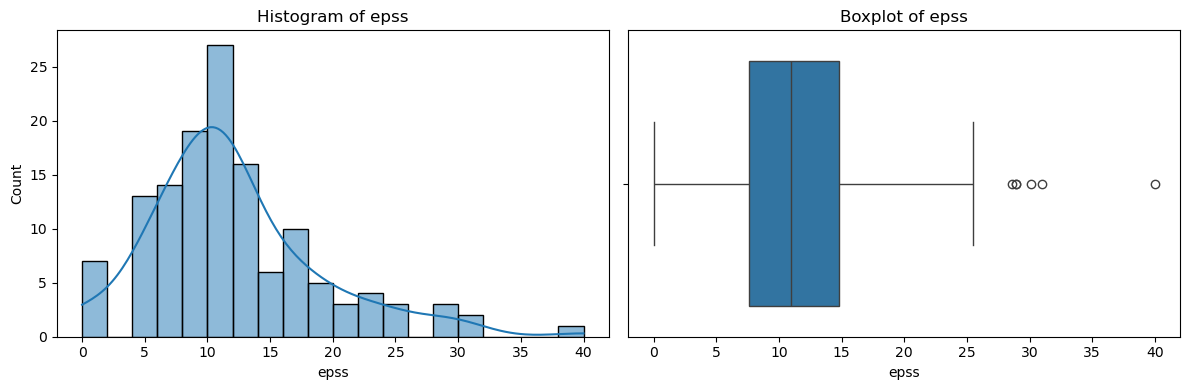

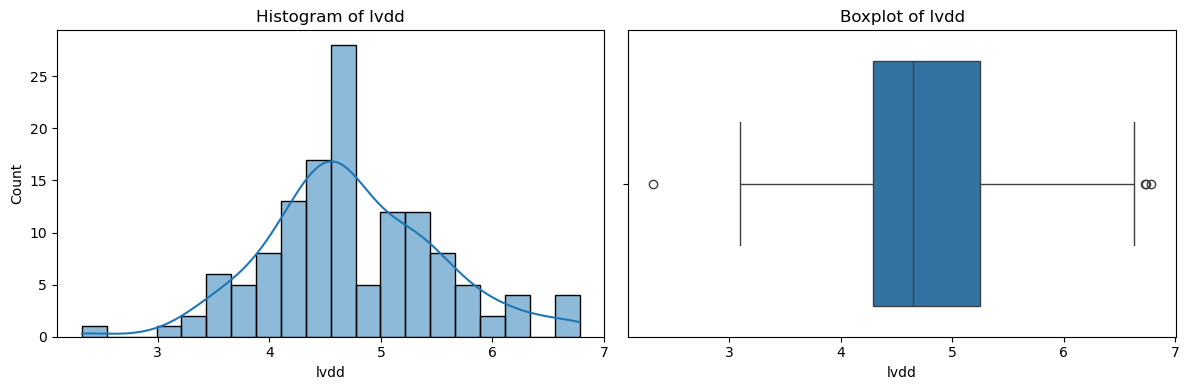

In [ ]:
#Task 3 (A)

#Plotting histograms and boxplots for continuous variables

cont_cols = ["age", "fractionalshortening", "epss", "lvdd"]

for col in cont_cols:
    plt.figure(figsize=(12,4))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Histogram of {col}")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

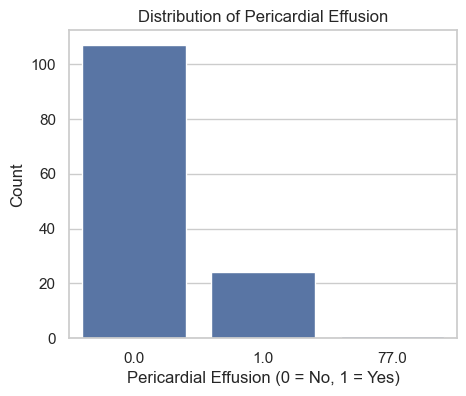

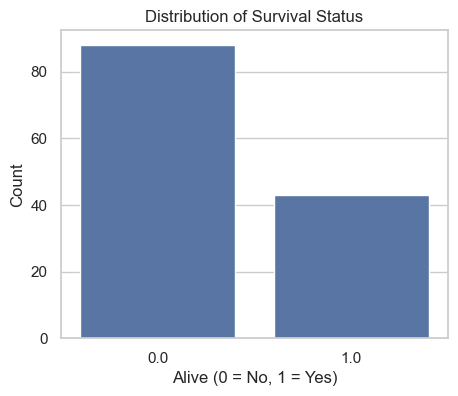

In [ ]:
#Task 3 (B)

sns.set(style="whitegrid")

# Bar chart for Pericardial Effusion

plt.figure(figsize=(5,4))
sns.countplot(x="pericardialeffusion", data=df)
plt.title("Distribution of Pericardial Effusion")
plt.xlabel("Pericardial Effusion (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Bar chart for Survival Status

plt.figure(figsize=(5,4))
sns.countplot(x="alive", data=df)
plt.title("Distribution of Survival Status")
plt.xlabel("Alive (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


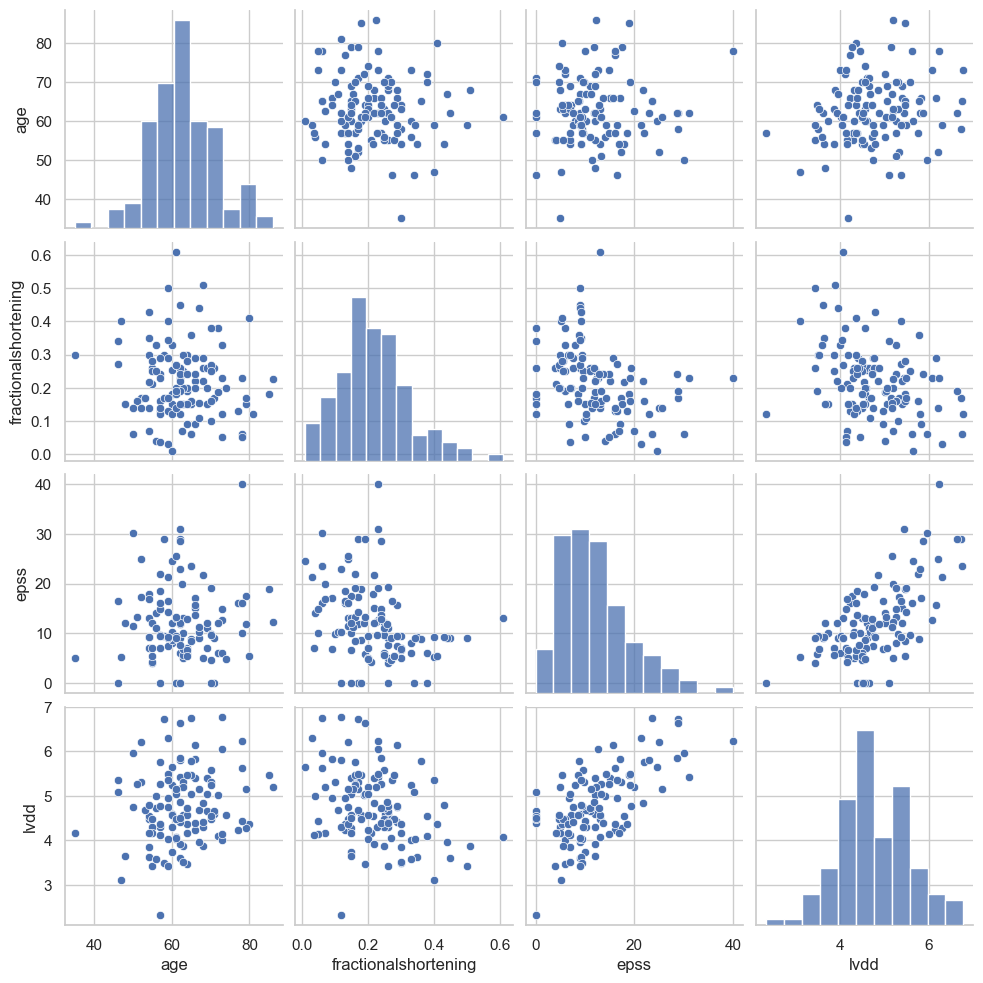

In [ ]:
#Task 3 (C)

# Numerical variables

num_cols = ["age", "fractionalshortening", "epss", "lvdd"]

# Pair plot

sns.pairplot(df[num_cols], diag_kind="hist")
plt.show()


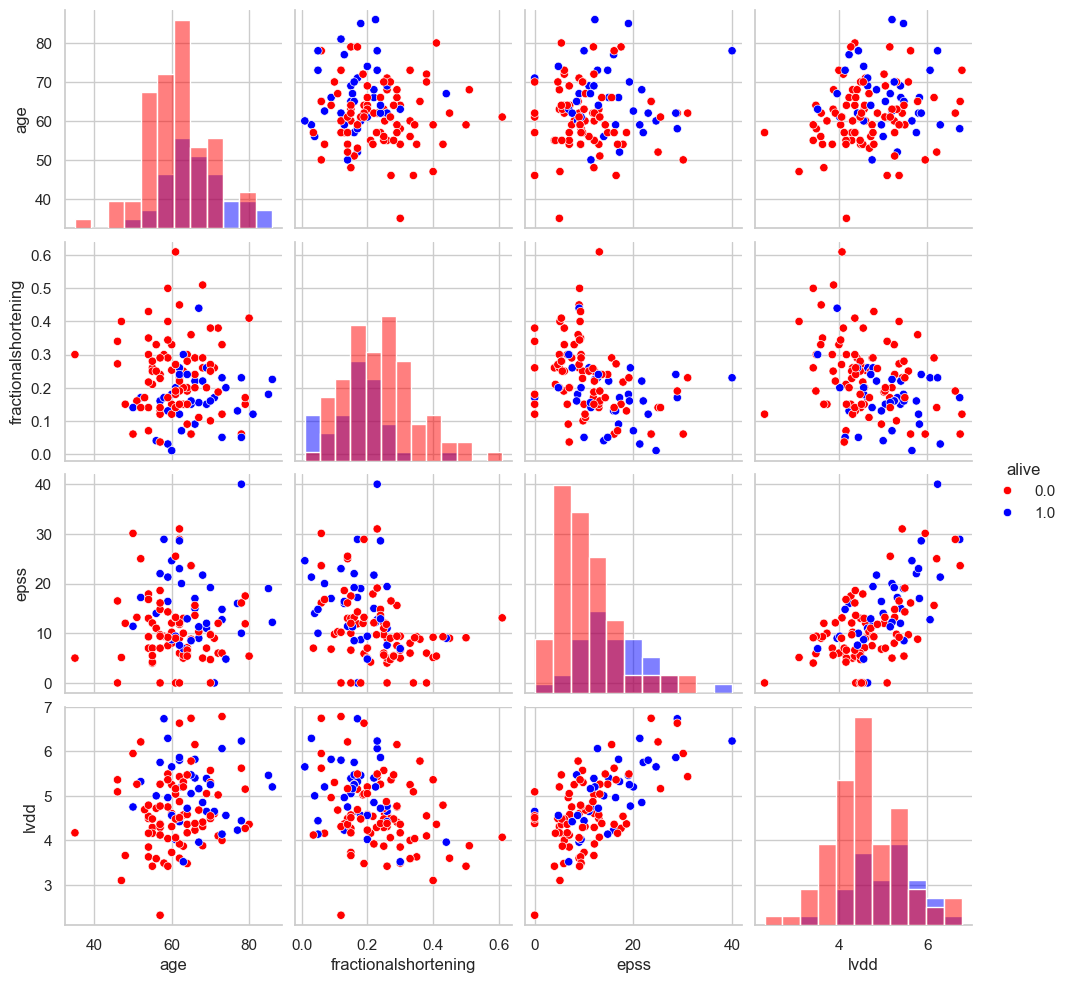

In [ ]:
#Task 3 (C)

# Numerical features

num_cols = ["age", "fractionalshortening", "epss", "lvdd"]

# Pair plot with survival distinction

sns.pairplot( df, vars=num_cols, hue="alive",
    palette={0: "red", 1: "blue"}, diag_kind="hist")

plt.show()



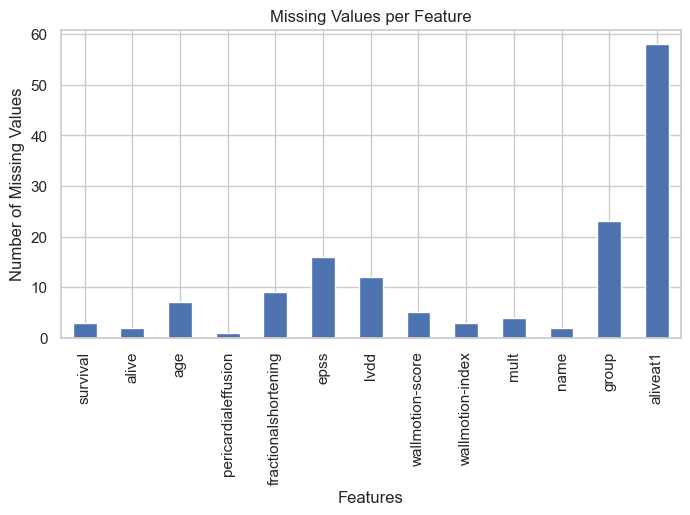

In [ ]:
# Task 3 (D)

# Count missing values

missing_counts = df.isnull().sum()

plt.figure(figsize=(8,4))
missing_counts[missing_counts > 0].plot(kind='bar')
plt.title("Missing Values per Feature")
plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.show()



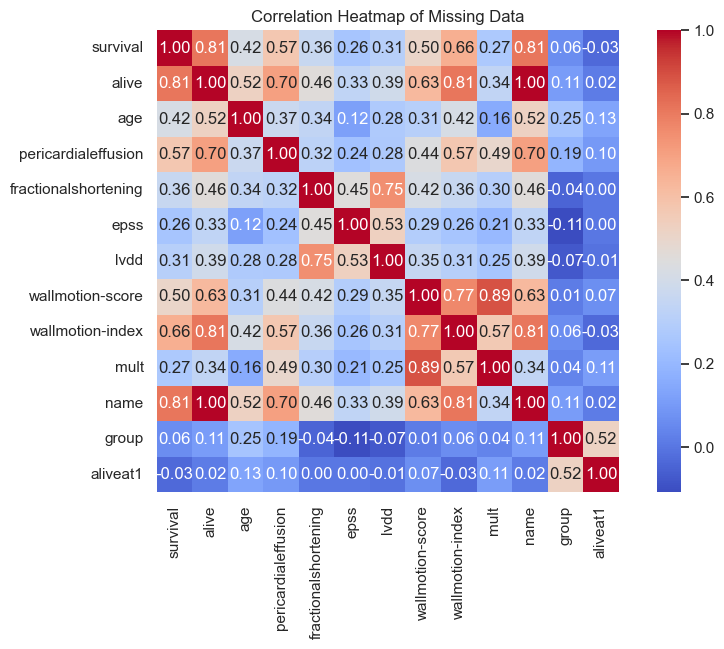

In [ ]:
#Task 3 (D)

# Correlation of missingness

missing_corr = df.isnull().corr()

# Plot heatmap

plt.figure(figsize=(10,6))
sns.heatmap( missing_corr, cmap="coolwarm", annot=True,fmt=".2f",square=True)

plt.title("Correlation Heatmap of Missing Data")
plt.show()


C:\Users\DAKSH KATHURIA\AppData\Local\Temp\ipykernel_31104\1747979787.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


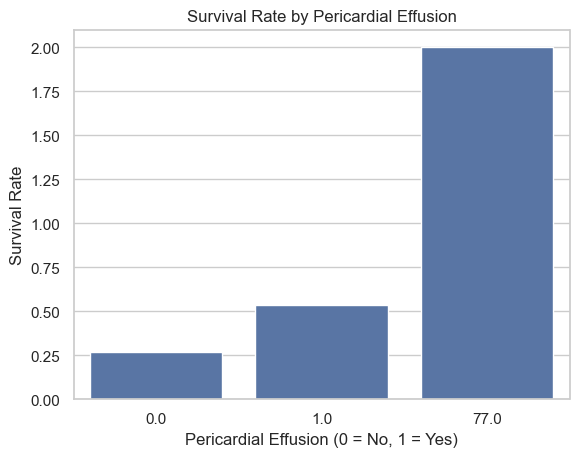

In [ ]:
#Task 3 (E)

# Exploring survival rates

sns.barplot( x="pericardialeffusion", y="aliveat1",data=df,ci=None )

plt.xlabel("Pericardial Effusion (0 = No, 1 = Yes)")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Pericardial Effusion")
plt.show()


In [ ]:
#Task 4

#SUMMARISING

print("\n==== SUMMARY REPORT ====")
print("Final Dataset Shape:", df.shape)
print("\nSurvival Rate:")
print(df["alive"].value_counts(normalize=True))

print("\nKey Insights:")
print("""1. Continuous missing values handled with median imputation.
2. Binary missing values handled with mode imputation.
3. Ambiguous survival records removed.
4. New target variable alive-at-1 created based on survival ≥12 months.
5. Features like age, lvdd, fractional-shortening were scaled.
6. Visualizations show distributions, relationships, and survival patterns.""")


==== SUMMARY REPORT ====
Final Dataset Shape: (133, 13)

Survival Rate:
alive
0.0    0.671756
1.0    0.328244
Name: proportion, dtype: float64

Key Insights:
1. Continuous missing values handled with median imputation.
2. Binary missing values handled with mode imputation.
3. Ambiguous survival records removed.
4. New target variable alive-at-1 created based on survival ≥12 months.
5. Features like age, lvdd, fractional-shortening were scaled.
6. Visualizations show distributions, relationships, and survival patterns.
